In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('placement.csv')

In [3]:
df.head()
df.shape

(200, 2)

Text(0, 0.5, 'Package(in lpa)')

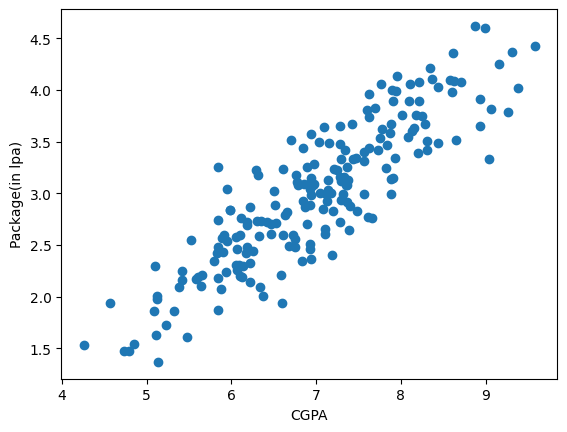

In [4]:
plt.scatter(df['cgpa'],df['package'])
plt.xlabel('CGPA')
plt.ylabel('Package(in lpa)')

In [5]:
X = df.iloc[:,0:1]
y = df.iloc[:,-1]

In [ ]:
y

0      3.26
1      1.98
2      3.25
3      3.67
4      3.57
       ... 
195    2.46
196    2.57
197    3.24
198    3.96
199    2.33
Name: package, Length: 200, dtype: float64

In [6]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [7]:
from sklearn.linear_model import LinearRegression

In [8]:
lr = LinearRegression()

In [9]:
lr.fit(X_train,y_train)

LinearRegression()

Text(0, 0.5, 'Package(in lpa)')

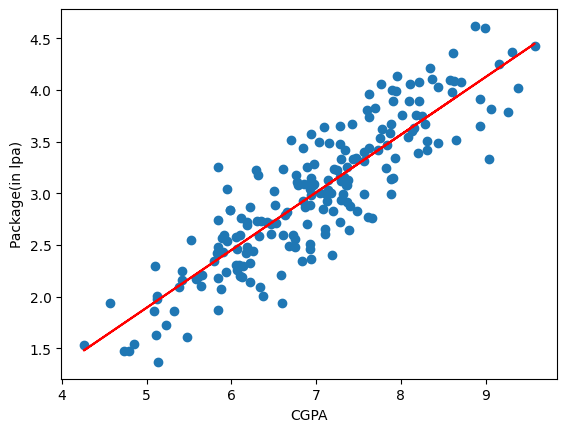

In [10]:
plt.scatter(df['cgpa'],df['package'])
plt.plot(X_train,lr.predict(X_train),color='red')
plt.xlabel('CGPA')
plt.ylabel('Package(in lpa)')

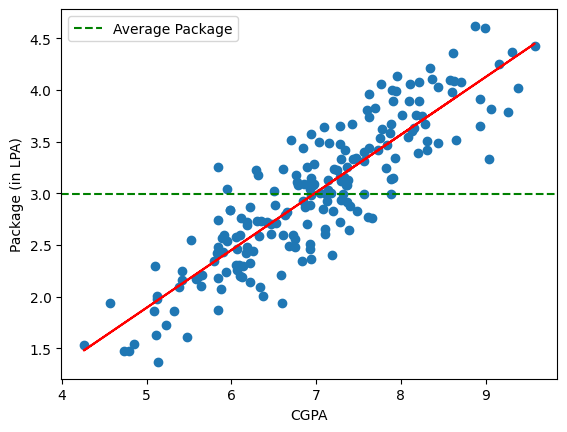

In [11]:
plt.scatter(df['cgpa'], df['package'])
plt.plot(X_train, lr.predict(X_train), color='red')

# Average package line
avg_package = df['package'].mean()
plt.axhline(y=avg_package, color='green', linestyle='--', label='Average Package')

plt.xlabel('CGPA')
plt.ylabel('Package (in LPA)')
plt.legend()
plt.show()


In [12]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [13]:
y_pred = lr.predict(X_test)

In [14]:
y_test.values

array([4.1 , 3.49, 2.08, 2.33, 1.94, 1.48, 1.86, 3.09, 4.21, 2.87, 3.65,
       4.  , 2.89, 2.6 , 2.99, 3.25, 1.86, 3.67, 2.37, 3.42, 2.48, 3.65,
       2.6 , 2.83, 4.08, 2.56, 3.58, 3.81, 4.09, 2.01, 3.63, 2.92, 3.51,
       1.94, 2.21, 3.34, 3.34, 3.23, 2.01, 2.61])

## MAE (Mean Absolute Error)

### Formula
$$
MAE = \frac{1}{n}\sum_{i=1}^{n} |y_i - \hat{y}_i|
$$

---

### What MAE represents
- **Absolute vertical distance** between the actual and predicted values  
- Measures the **straight-line (absolute) error**

---

### ✅ Advantage
- **Robust to outliers**  
  (errors are not squared, so large errors do not dominate)

---

### ❌ Disadvantage
- **Not differentiable at 0**  
  (makes optimization using calculus difficult)


In [15]:
print("MAE",mean_absolute_error(y_test,y_pred))

MAE 0.2884710931878175


## MSE (Mean Squared Error)

### Formula
$$
MSE = \frac{1}{n}\sum_{i=1}^{n} (y_i - \hat{y}_i)^2
$$

---

### What MSE represents
- **Squared vertical distance** between the actual and predicted values  
- Larger errors are **penalized more heavily** due to squaring

---

### ✅ Advantage
- **Differentiable everywhere**  
- Suitable as a **loss function in linear regression**

---

### ❌ Disadvantage
- **Not robust to outliers**  
  (large errors dominate because they are squared)


In [ ]:
print("MSE",mean_squared_error(y_test,y_pred))

MSE 0.12129235313495527


## RMSE (Root Mean Squared Error)

### Formula
$$
RMSE = \sqrt{MSE}
$$

$$
RMSE = \sqrt{\frac{1}{n}\sum_{i=1}^{n}(y_i - \hat{y}_i)^2}
$$

---

### Steps to compute RMSE
- **First** → square the errors $ (y_i - \hat{y}_i)^2 $
- **Then** → take the mean of squared errors
- **Finally** → take the square root


---

### Key Insight
👉 **RMSE is simply MSE expressed in the original units of the target variable**, which makes it easier to interpret.


In [ ]:
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))

RMSE 0.34827051717731616


## R² Score (Coefficient of Determination)

### Formula
$$
R^2 = 1 - \frac{SSR}{SSM}
$$

---

### Where:

#### 🔹 Residual Sum of Squares (SSR)
$$
SSR = \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
$$

- Measures the **error of the regression model**
- Difference between actual and predicted values

---

#### 🔹 Total Sum of Squares (SSM)
$$
SSM = \sum_{i=1}^{n} (y_i - \bar{y})^2
$$

- Measures the **total variation** around the mean
- Baseline (mean) model error

---

### Interpretation
- $R^2 = 1$ → Perfect fit  
- $R^2 = 0$ → Model is no better than predicting t


In [ ]:
print("r2",r2_score(y_test,y_pred))
r2 = r2_score(y_test,y_pred)

MSE 0.780730147510384


### Adjusted $R^2$

$$
R^2_{\text{adj}} = 1 - \frac{(1 - R^2)(n - 1)}{(n - 1 - k)}
$$

#### Meaning of Symbols
- $R^2$ : R-squared value  
- $n$ : Number of rows / observations  
- $k$ : Number of independent variables (features)


In [ ]:
# Adjusted R2 score
X_test.shape

(40, 1)

In [ ]:
1 - ((1-r2)*(40-1)/(40-1-1))

0.7749598882343415

In [ ]:
new_df1 = df.copy()
new_df1['random_feature'] = np.random.random(200)

new_df1 = new_df1[['cgpa','random_feature','package']]
new_df1.head()

,cgpa,random_feature,package
0,6.89,0.309720,3.26
1,5.12,0.302370,1.98
2,7.82,0.171968,3.25
3,7.42,0.585555,3.67
4,6.94,0.171229,3.57


Text(0, 0.5, 'Package(in lpa)')

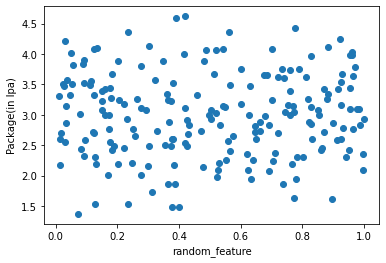

In [ ]:
plt.scatter(new_df1['random_feature'],new_df1['package'])
plt.xlabel('random_feature')
plt.ylabel('Package(in lpa)')

In [ ]:
X = new_df1.iloc[:,0:2]
y = new_df1.iloc[:,-1]

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [ ]:
lr = LinearRegression()

In [ ]:
lr.fit(X_train,y_train)

LinearRegression()

In [ ]:
y_pred = lr.predict(X_test)

In [ ]:
print("R2 score",r2_score(y_test,y_pred))
r2 = r2_score(y_test,y_pred)

R2 score 0.781133851209665


In [ ]:
1 - ((1-r2)*(40-1)/(40-1-2))

0.7693032485723497

In [ ]:
new_df2 = df.copy()

new_df2['iq'] = new_df2['package'] + (np.random.randint(-12,12,200)/10)

new_df2 = new_df2[['cgpa','iq','package']]

In [ ]:
new_df2.sample(5)

,cgpa,iq,package
42,5.95,2.44,2.54
180,6.19,1.52,2.72
38,8.62,5.06,4.36
23,6.19,2.38,2.48
98,7.69,3.83,3.83


Text(0, 0.5, 'Package(in lpa)')

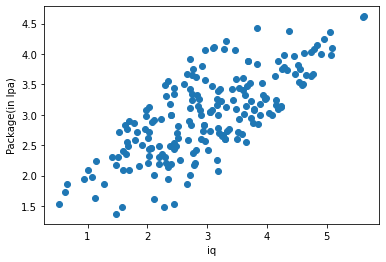

In [ ]:
plt.scatter(new_df2['iq'],new_df2['package'])
plt.xlabel('iq')
plt.ylabel('Package(in lpa)')

In [ ]:
np.random.randint(-100,100)

44

In [ ]:
X = new_df2.iloc[:,0:2]
y = new_df2.iloc[:,-1]

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [ ]:
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

In [ ]:
print("R2 score",r2_score(y_test,y_pred))
r2 = r2_score(y_test,y_pred)

R2 score 0.8000928965773431


In [ ]:
1 - ((1-r2)*(40-1)/(40-1-2))

0.7892871072031453